# Задание к занятию «Временные ряды, общая теория»

Найти на сайте 2 временных ряда, которые больше всего понравятся и сделать их стационарными. Работу оформить, как сделано в шаблоне "Пример полноценного анализа".

Выбранные временные ряды:
- Курс австралийского доллара: https://datamarket.com/data/set/22wv/exchange-rate-of-australian-dollar-a-for-1-us-dollar-monthly-average-jul-1969-aug-1995#!ds=22wv&display=line
- Средняя температура в Далласе: https://datamarket.com/data/set/235d/mean-daily-temperature-fisher-river-near-dallas-jan-01-1988-to-dec-31-1991#!ds=235d&display=line

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline
import re

/Users/frost/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# переносим функции из файла с примером анализа

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

# Ряд 1

In [64]:
# 1. Курс австралийского доллара (1969-1995)
# загружаем данные временного ряда (имя колонки - шедевр, конечно)
series = pd.read_csv("exchange-rate-of-australian-doll.csv")["Exchange rate of Australian dollar: $A for 1 US dollar. Monthly average: Jul 1969 ? Aug 1995"]
# убираем N/A значения - без них не работает тест Дики-Фуллера
series.dropna(inplace=True)

In [65]:
# проверяем ряд на стационарность
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -0.847683
p-value                          0.804713
#Lags Used                       0.000000
Number of Observations Used    313.000000
Critical Value (1%)             -3.451416
Critical Value (5%)             -2.870819
Critical Value (10%)            -2.571714
dtype: float64


In [ ]:
# значение p-value 0.804713 лежит вне доверительного интервала

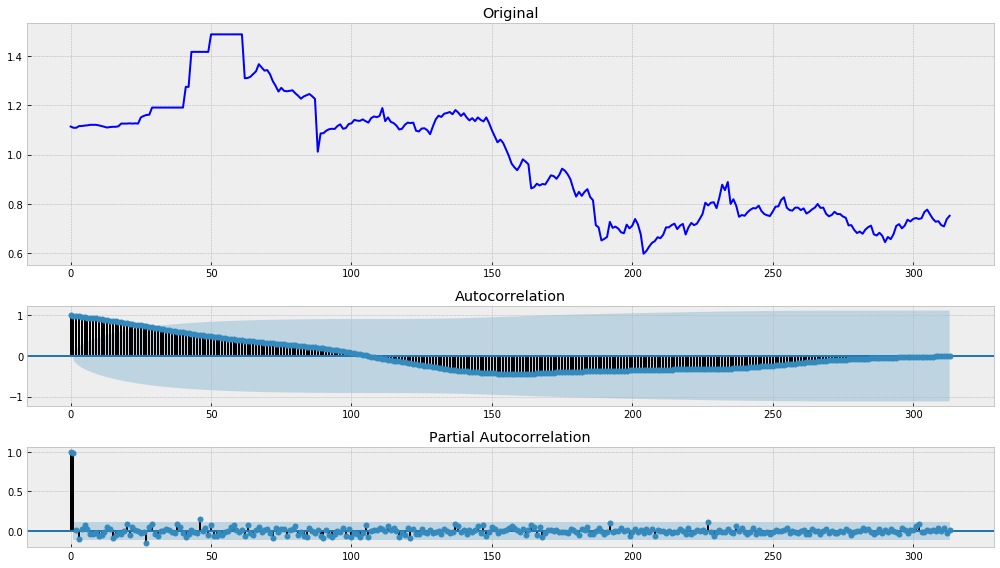

In [66]:
# смотрим на графики коррелограмм
tsplot(series)

In [67]:
# Что видим:
# во временном ряде присутствуют тренды - он нестационарен
# присутствует затухающая автокорреляция
# частичной автокорреляций выше синей линии почти нет
# сезонность не обнаружена

In [68]:
# нормализуем дисперсию ряда
series_bk = boxcox(series, 0)

In [71]:
test_stationarity(series_bk)

Results of Dickey-Fuller Test:
Test Statistic                  -0.890929
p-value                          0.790945
#Lags Used                       0.000000
Number of Observations Used    313.000000
Critical Value (1%)             -3.451416
Critical Value (5%)             -2.870819
Critical Value (10%)            -2.571714
dtype: float64


In [ ]:
# значение p-value упало незначительно

In [72]:
# дифференцируем ряд
series_bk_diff = np.diff(series_bk, 1)

In [74]:
test_stationarity(series_bk_diff)

Results of Dickey-Fuller Test:
Test Statistic                -9.716906e+00
p-value                        9.774852e-17
#Lags Used                     3.000000e+00
Number of Observations Used    3.090000e+02
Critical Value (1%)           -3.451691e+00
Critical Value (5%)           -2.870939e+00
Critical Value (10%)          -2.571778e+00
dtype: float64


In [ ]:
# p-value упало до очень низкого значения

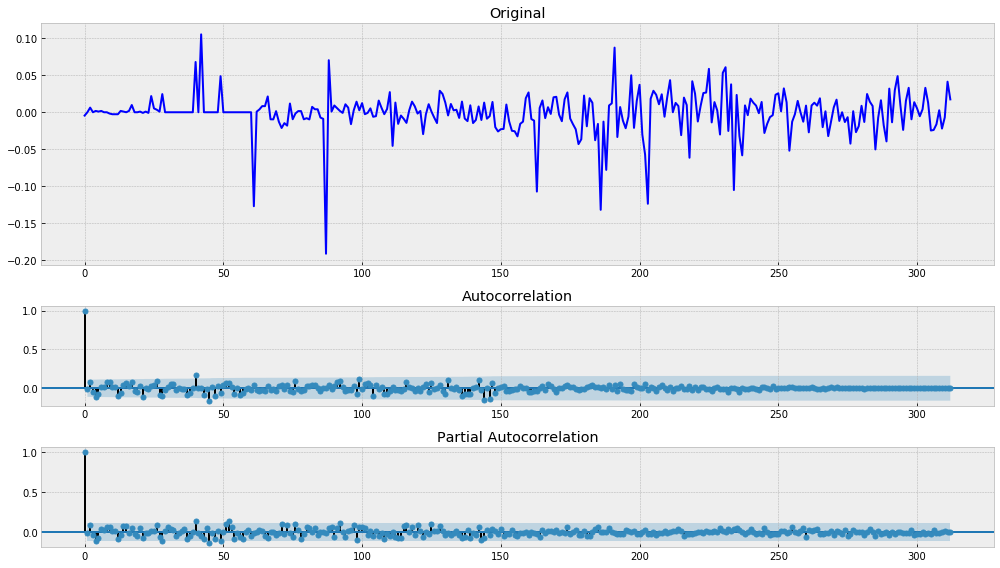

In [73]:
tsplot(series_bk_diff)

In [ ]:
# видим что ушли тренды
# видим затухающую автокорреляцию - признак стационарного ряда

# Ряд 2

In [58]:
# 2. Средняя температура в Далласе
series2 = pd.read_csv("mean-daily-temperature-fisher-ri.csv", sep=",")["Mean daily temperature, Fisher River near Dallas, Jan 01, 1988 to Dec 31, 1991"]
series2 = series2.str.replace("?", "")
series2 = series2.astype('float32')

In [59]:
test_stationarity(series2)

Results of Dickey-Fuller Test:
Test Statistic                   -4.563489
p-value                           0.000151
#Lags Used                       14.000000
Number of Observations Used    1446.000000
Critical Value (1%)              -3.434880
Critical Value (5%)              -2.863541
Critical Value (10%)             -2.567835
dtype: float64


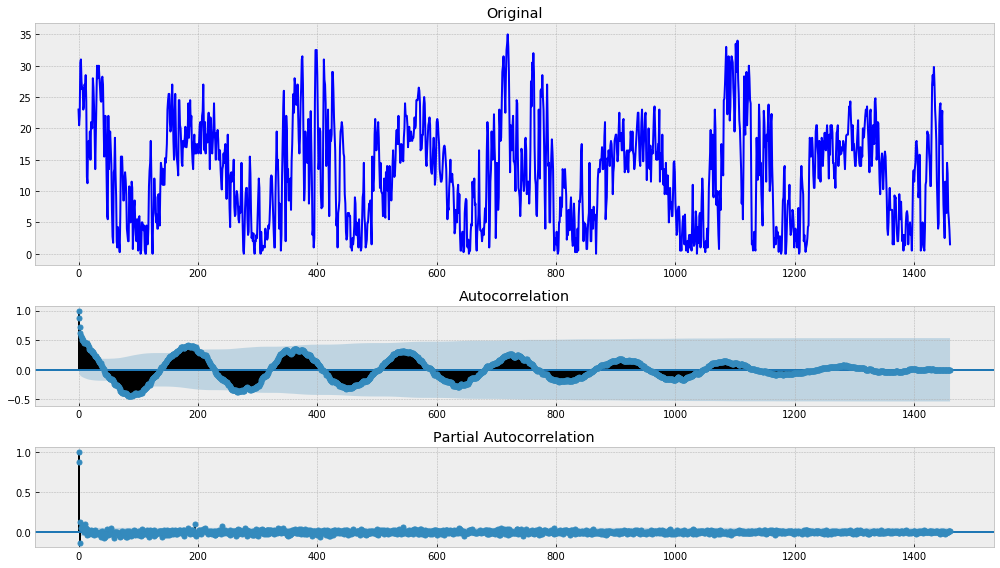

In [49]:
tsplot(series2)

In [ ]:
# затухающая автокорреляция - говорит о стационарности ряда
# очевидно наличие сезонности

In [61]:
# нормализуем дисперсию ряда 
# (перед этим прибавляем 5 ко всей температуре чтобы избежать отрицательных значений)
series2    = series2 + 5
series2_bk = boxcox(series2, 0)

In [62]:
test_stationarity(series2_bk)

Results of Dickey-Fuller Test:
Test Statistic                   -5.102861
p-value                           0.000014
#Lags Used                       10.000000
Number of Observations Used    1450.000000
Critical Value (1%)              -3.434868
Critical Value (5%)              -2.863535
Critical Value (10%)             -2.567832
dtype: float64


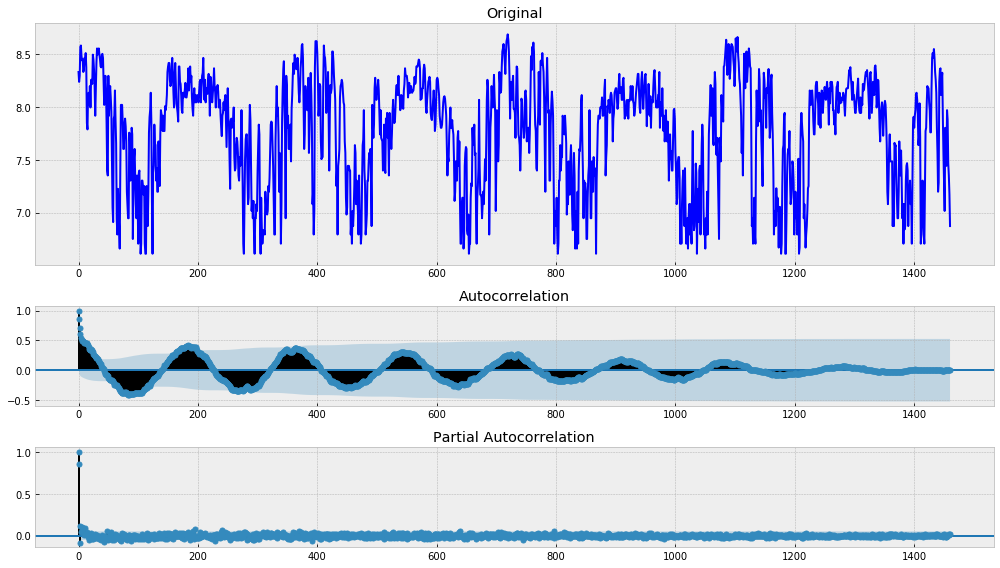

In [63]:
tsplot(series2)

In [ ]:
# видим затухающую автокорреляцию - признак стационарного ряда